In [63]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, callbacks
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [75]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [76]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [77]:
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

In [78]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [79]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 flatten_8 (Flatten)         (None, 3872)              0         
                                                                 
 dense_22 (Dense)            (None, 32)                123936    
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                     

In [81]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, min_delta=0.001, verbose=1, mode='auto')

In [82]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 29s 30ms/step - loss: 0.5262 - accuracy: 0.8103 - val_loss: 0.3829 - val_accuracy: 0.8680
Epoch 2/20
938/938 [==============================] - 29s 31ms/step - loss: 0.3454 - accuracy: 0.8765 - val_loss: 0.3399 - val_accuracy: 0.8797
Epoch 3/20
938/938 [==============================] - 29s 31ms/step - loss: 0.2922 - accuracy: 0.8950 - val_loss: 0.3111 - val_accuracy: 0.8865
Epoch 4/20
938/938 [==============================] - 28s 30ms/step - loss: 0.2613 - accuracy: 0.9061 - val_loss: 0.2875 - val_accuracy: 0.8947
Epoch 5/20
938/938 [==============================] - 28s 30ms/step - loss: 0.2393 - accuracy: 0.9133 - val_loss: 0.2723 - val_accuracy: 0.9015
Epoch 6/20
938/938 [==============================] - 28s 30ms/step - loss: 0.2192 - accuracy: 0.9198 - val_loss: 0.2709 - val_accuracy: 0.9029
Epoch 7/20
938/938 [==============================] - 29s 30ms/step - loss: 0.2029 - accuracy: 0.9261 - val_loss: 0.2510 - val_accuracy:

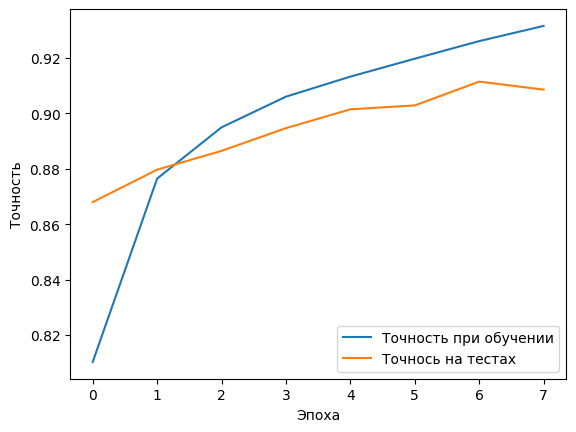

In [83]:
plt.plot(history.history['accuracy'], label='Точность при обучении')
plt.plot(history.history['val_accuracy'], label='Точнось на тестах')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()

In [84]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Производительность модели: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.2620 - accuracy: 0.9086
Производительность модели: 0.9085999727249146
